<a href="https://colab.research.google.com/github/Meitiann/INF2008-ML-Labs/blob/main/Week10_INF2008_Lab_2302073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Week 10 Lab: Dimension Reduction

<style>
    table {font-size: 20px;}  /* Increases table font size */
    td {text-align: left;}     /* Ensures left alignment */
</style>

<table>
<tr><td><b>Filename</b></td> <td>`Week10 INF2008 Lab.Student.ipynb`</td></tr>
<tr><td><b>Version</b></td> <td>`1.0`</td></tr>
<tr><td><b>Description</b></td> <td>Jupyter notebook for INF2008 Lab Week 10 exercises.</td></tr>
<tr><td><b>Module</b></td> <td>INF2008</td></tr>
<tr><td><b>Prepared by</b></td> <td>Donny Soh</td></tr>
<tr><td><b>Organisation</b></td> <td>Singapore Institute of Technology</td></tr>
<tr><td><b>Division</b></td> <td>Infocomm Technology</td></tr>
<tr><td><b>Attribution</b></td> <td>Copyright &copy; 2025 Donny Soh – All Rights Reserved</td></tr>
<tr><td><b>Reference</b></td> <td>Previous INF2008 materials</td></tr>
</table>


Learning Objectives

By the end of this lab, students will be able to:

1. Understand the fundamental concepts of Principal Component Analysis (PCA) and how it reduces dimensionality while preserving variance.

2. Apply PCA for facial image reconstruction, analyzing how different numbers of principal components impact image quality.

3. Use t-Distributed Stochastic Neighbor Embedding (t-SNE) to visualize high-dimensional datasets in a lower-dimensional space.

4. Evaluate the impact of dimensionality reduction on classification models.

5. Interpret accuracy scores to assess model performance after dimensionality reduction.

Principal Component Analysis (PCA) transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

In [ ]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for data processing and dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scikit-learn modules for datasets and classification
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier

# Scikit-learn modules for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 10.1 PCA for Facial Reconstruction

The first exercise we will be doing is to use Principal Component Analysis (PCA) for dimensionality reduction on images of faces. Our dataset, Labeled Faces in the Wild (LFW), contains images of well-known individuals, and we will analyze its structure before applying PCA.

We will use the fetch_lfw_people function from sklearn.datasets to load images of faces. The dataset contains grayscale images of famous people.

*Student Task*: Complete the code below to load the dataset. Set `min_faces_per_person=60` to filter out people with fewer than 60 images.

In [ ]:
# TODO: Load the dataset (set min_faces_per_person=60)
faces = fetch_lfw_people(min_faces_per_person=____)  # <-- Fill in the missing value

# TODO: Print the names of the people in the dataset
print("Target names:", ____)  # <-- What attribute holds the names?

# TODO: Print the shape of the images (how many images, their height & width)
print("Image shape:", ____)  # <-- What attribute holds the image data?

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


#### 10.1.1 Understanding the LFW Dataset

* faces.target_names gives us a list of the individuals present in the dataset.
* faces.images.shape returns the dimensions of the dataset, typically (n_samples, height, width), where:
n_samples is the number of images.
* height and width represent the pixel dimensions of each face.

This dataset is widely used for face recognition and verification tasks, and PCA will help us reduce the dimensionality while retaining essential features.

Facial images have thousands of pixels, making direct processing computationally expensive. PCA helps extract the most important features (also known as eigenfaces) while reducing redundant information.
It improves efficiency in face recognition by representing each face using fewer components.

Now, let's apply PCA to extract the most important features (also known as eigenfaces) from these images. Each image in the dataset is flattened into a 1D array before applying PCA, meaning that each row represents an image as a set of pixel values.

*Student Task*: Complete the missing code below to apply PCA with **150 principal components**.

In [ ]:
# TODO: Create a PCA model with 150 components
pca = PCA(n_components=____)  # <-- Fill in the correct number

# TODO: Fit PCA to the dataset
pca.____(faces.____)  # <-- Fill in the correct method and dataset attribute

PCA(n_components=150)

The code above means the following:

* PCA(150): Specifies that we want to retain 150 principal components (which capture most of the variance in the dataset).

* faces.data → The dataset contains flattened images, meaning each image is represented as a 1D array of pixel values. PCA will learn a lower-dimensional representation from this data.

* pca.fit(faces.data) → Finds the principal components that best represent the variance in the dataset.

#### 10.1.2 Visualization of EigenFaces

Now that we have applied PCA to reduce the dimensionality of our facial images, we can visualize the principal components, also known as eigenfaces. These eigenfaces represent the most important features that PCA has learned from the dataset.

Eigenfaces are the principal components of the facial dataset. Each eigenface captures a pattern of variation across all images. When combined, they can reconstruct any face in the dataset using a weighted sum.

The line:
ax.imshow(____.components_[i].reshape(____, ____), cmap='bone')

Displays the eigenfaces. pca.components_ contains the eigenfaces as flattened vectors. It is first reshaped into a 62x47 grayscale image.

The images look ghostly because instead of the original image as a 62 by 47 = 2,914 pixels, we are reducing each image to a 150-dimensional representation.

*Student Task*: Complete the code below to display the **first 24 principal components** as grayscale images.

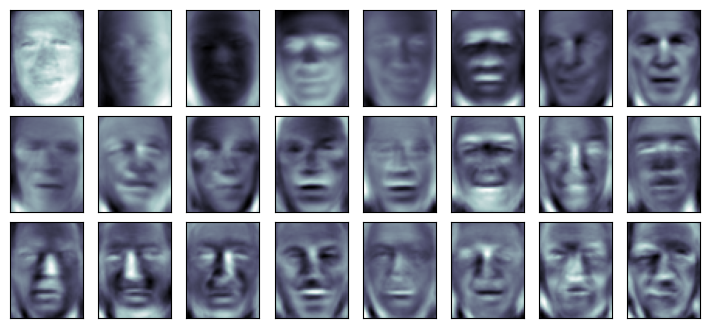

In [ ]:
# TODO: Import Matplotlib
import matplotlib.pyplot as plt

# TODO: Create subplots for displaying principal components
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# TODO: Loop through and display the first 24 principal components
for i, ax in enumerate(axes.flat):
    ax.imshow(____.components_[i].reshape(____, ____), cmap='bone')  # <-- Fill in correct PCA attribute and image dimensions

#### 10.1.3 Understanding the Explained Variance in PCA

Now that we have reduced the dimensionality of our dataset using 150 principal components, we need to evaluate how much of the total variance is retained. The explained variance ratio helps us understand this.

One important aspect of PCA is understanding how much of the original data variance is retained as we increase the number of principal components.

A cumulative explained variance plot helps us determine the optimal number of components by showing how much variance is captured as we include more components.

*Student Task*: Complete the missing parts of the code below to generate a plot showing how much variance is retained as the number of components increases.


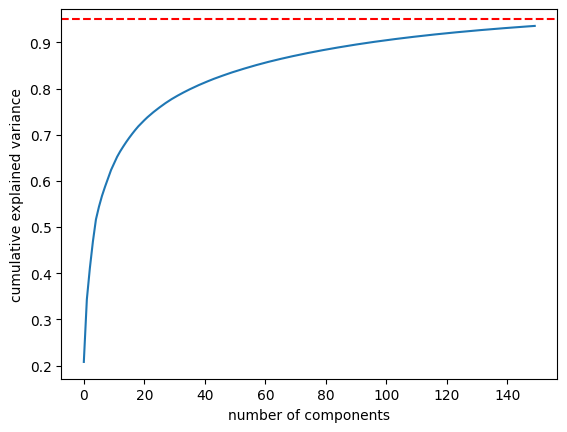

In [ ]:
# TODO: Plot the cumulative sum of explained variance ratio
plt.plot(np.____(pca.____))  # <-- Fill in correct NumPy method and PCA attribute

# TODO: Label the axes
plt.xlabel('____')  # <-- Fill in the correct label
plt.ylabel('____')

# TODO: Add a reference line for 95% explained variance
plt.axhline(y=____, color='r', linestyle='--', label='95% Variance')  # <-- Fill in the correct threshold

plt.legend()
plt.show()

Let's explain the main parts of the code.

pca.explained_variance_ratio_
This array contains the percentage of variance explained by each principal component.
Example: If the first component explains 20% variance, the second explains 15%, etc.

np.cumsum(pca.explained_variance_ratio_)
Computes the cumulative sum of the explained variance.

Example:
* First component: 20%
* First two components together: 35% (20% + 15%)
* First three components together: 48% (20% + 15% + 13%)

This helps us see how many components are needed to capture most of the variance. The goal is typically to use the components to capture 95%+ of the variance. Typically the curve will steeply rise at first, then flatten out.

This indicates that most of the variance is explained by the first few components. If the curve reaches 95% at 150 components, it confirms that we made a good choice. In this case you notice it still misses it by a wee little bit.

*Student Task*: Complete the code below to fit PCA with **95% explained variance** and transform the facial images.

In [ ]:
# TODO: Create a PCA model that preserves 95% of the variance
pca = PCA(n_components=____)  # <-- Fill in the correct value

# TODO: Fit PCA to the dataset
pca.fit(____)  # <-- Fill in the correct dataset attribute

# TODO: Transform the dataset using the fitted PCA model
components = pca.____(____)  # <-- Fill in the correct method and dataset

Notice that we use a bit more components, this time 184 instead of 150.

In [ ]:
components.shape

(1348, 184)

*Student Task*: Complete the missing parts of the code below to generate a plot showing how much variance is retained as the number of components increases.

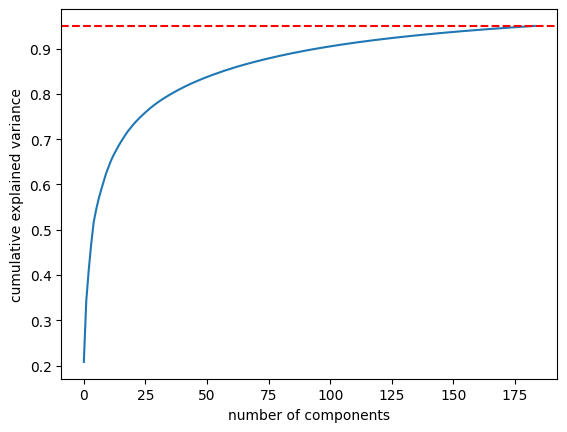

In [ ]:
# TODO: Plot the cumulative sum of explained variance ratio
plt.plot(np.____(pca.____))  # <-- Fill in correct NumPy method and PCA attribute

# TODO: Label the axes
plt.xlabel('____')  # <-- Fill in the correct label
plt.ylabel('____')

# TODO: Add a reference line for 95% explained variance
plt.axhline(y=____, color='r', linestyle='--', label='95% Variance')  # <-- Fill in the correct threshold

plt.legend()
plt.show()

#### 10.1.4 Parts of the PCA.

PCA stores several key pieces of information that allow us to compress, reconstruct, and interpret the dataset effectively.

1.   Principal Components (Eigenvectors): Stored in pca.components_
This is a matrix of eigenvectors, where each row represents a principal component (also called an eigenface in facial recognition tasks).
These components serve as basis vectors in the new feature space.

2.   Shape: (n_components, original_dimensionality)
Example: If we keep 150 principal components for images of size 62 × 47 = 2,914 pixels, the shape will be (150, 2,914).

3.   Explained Variance: Stored in pca.explained_variance_
This tells us how much variance each principal component captures.
Helps us determine how many components are needed to retain a certain amount of information. We will visualize this later in the example.

4.   Mean of the Data
Stored in pca.mean_
Represents the average of all the input samples.
PCA centers the dataset by subtracting this mean from each sample before computing principal components.
In face datasets, this represents the mean face (the average of all faces in the dataset).

5.   Transformed Data (PCA Projection)
This represents the data projected onto the lower-dimensional PCA space.
Each data point is now stored as a set of principal component scores (instead of raw features).
Shape: (n_samples, n_components)
If we use 150 components for 1,000 images, the shape will be (1,000, 150).

6.   Reconstruction Matrix: Obtained using pca.inverse_transform(components)
This reverses the transformation, reconstructing an approximation of the original data. It multiplies the PCA-transformed data by the stored principal components and adds back the mean.

Lets visualize them one at a time here.

10.1.4.1 Principal Components

After applying PCA, the **principal components** are stored in pca.components_. This attribute represents the eigenvectors (principal axes) of the data, where each row corresponds to a principal component.

10.1.4.2 Shape

By checking its shape, we can determine:
1. The number of principal components selected (rows).
2. The number of original features in the dataset (columns).

*Student Task*: Complete the code below to display the number of principal components.


In [ ]:
# TODO: Print the shape of the PCA components (eigenvectors)
print("Shape of Principal Components (Eigenvectors):", ____.____.____)  # <-- Fill in the correct attribute

Shape of Principal Components (Eigenvectors): (184, 2914)


10.1.4.3 Explained Variance

As above!

10.1.4.4 Mean

PCA computes the mean face, which represents the average of all images in the dataset. This is useful because PCA captures variance relative to this mean image.

By reshaping pca.mean_ to the original image dimensions (62, 47), we can visualize this mean face.

*Student Task*: Complete the code below to visualize the average face computed by PCA.

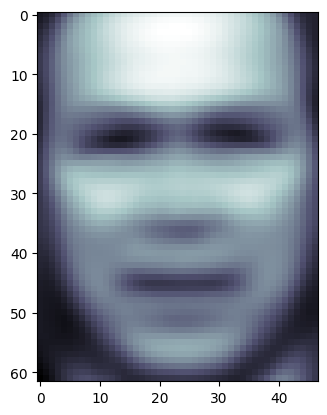

In [ ]:
# TODO: Display the mean face computed by PCA
plt.imshow(____.____.reshape(____, ____), cmap='bone')  # <-- Fill in the correct attribute and dimensions

# TODO: Add a title
plt.title("Mean Face")
plt.show()

10.1.4.5 Transformed Data (PCA Projection)

After applying PCA, the dataset is transformed into a new feature space where each sample is represented by a reduced number of principal components. This transformed dataset is stored in components.

By checking the shape of components, we can determine:
- The number of samples (images) in the dataset (rows).
- The number of principal components used (columns).

*Student Task*: Complete the code below to check how PCA has reduced the dimensionality.

In [ ]:
# TODO: Print the shape of the transformed dataset after PCA
print("Shape of Transformed Data (PCA Components):", ____.____)  # <-- Fill in the correct variable and attribute

(1348, 184)

Key Differences: pca.components_ vs pca.transform(X)

| **Attribute**                 | **pca.components_ (Principal Components)** | **pca.transform(X) (Projected Data)** |
|--------------------------------|---------------------------------------------|-----------------------------------------|
| **What it stores**             | The eigenvectors (new axes)                 | The new coordinates of data in PCA space |
| **Shape**                      | (n_components, n_features)                | (n_samples, n_components)             |
| **Purpose**                    | Defines the new basis vectors               | Stores the compressed representation of each sample |
| **Fixed or Variable?**         | Fixed after fitting PCA                     | Changes depending on the input data     |
| **Analogy**                    | The axes of a rotated coordinate system     | The coordinates of each point in the new system |


10.1.4.6 Inverse transform (Reconstruction)

After applying PCA for dimensionality reduction, the original data can be approximately reconstructed using the following formula:


$$
X_{\text{reconstructed}} = X_{\text{pca}} \cdot \text{components} + \text{mean}
$$

where:
$$(X_{\text{reconstructed}})$$
The approximated original data after inverse transformation.

$$(X_{\text{pca}})$$
The data transformed into the lower-dimensional PCA space.

$$(\text{components})$$
The principal component matrix (`pca.components_`), which contains the eigenvectors.

$$(\text{mean})$$
The dataset mean (`pca.mean_`), which was subtracted before transformation.

After reducing the dimensionality of the dataset using PCA, we can attempt to reconstruct the original images using the inverse transformation. This process helps us visualize how much information is lost when we retain only a subset of the principal components.

The function pca.inverse_transform(components) reverses the PCA transformation, projecting the reduced representations back into the original feature space.

*Student Task*: Complete the code below to reconstruct the images using PCA’s inverse transformation.

In [ ]:
# TODO: Apply inverse transformation to reconstruct images from PCA components
projected = ____.____(____)  # <-- Fill in the correct method and variable

Now that we have reconstructed the images using PCA’s inverse transformation, we can visually compare them to the original images. This helps us understand how much detail is lost due to dimensionality reduction.

The first row will display the original images, while the second row will show the reconstructed images after reducing and restoring them with PCA.

*Student Task*: Complete the code below to plot the **first 10 images** before and after PCA reconstruction.


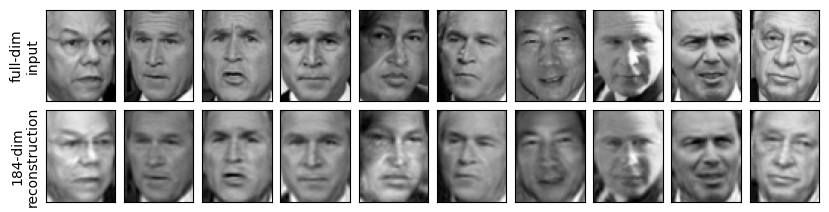

In [ ]:
# TODO: Create subplots for visualization
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

# TODO: Loop through and display original vs reconstructed images
for i in range(10):
    ax[0, i].imshow(____.____[i].reshape(____, ____), cmap='binary_r')  # <-- Fill in the original dataset attribute
    ax[1, i].imshow(____[i].reshape(____, ____), cmap='binary_r')  # <-- Fill in the projected dataset variable

# TODO: Add labels for clarity
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('reconstruction')

plt.show()

### 10.2 Dimension Reduction for Classification Tasks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Now, we will work with the Fashion MNIST dataset, which contains grayscale images of clothing items.

The Fashion MNIST dataset is loaded, containing grayscale images of clothing items. Each image is flattened into a 1D array and normalized by dividing by 255.0 to scale pixel values between 0 and 1, preparing the data for PCA processing.

*Student Task*: Complete the code below to load Fashion MNIST and reshape the images for PCA.


In [ ]:
# TODO: Load the dataset
print("Loading Fashion MNIST dataset...")
(X_train, y_train), (X_test, y_test) = ____.____()  # <-- Fill in the correct function

# TODO: Flatten and normalize the images
X_train = X_train.reshape(X_train.shape[0], -1) / ____  # <-- Normalize pixel values
X_test = X_test.reshape(X_test.shape[0], -1) / ____

Loading Fashion MNIST dataset...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


A set of sample images from the Fashion MNIST dataset is visualized using matplotlib. Each image is reshaped back to 28×28 pixels and displayed in grayscale to provide a quick overview of the dataset's content.

*Student Task*: Complete the code below to visualize 18 random images from the dataset.

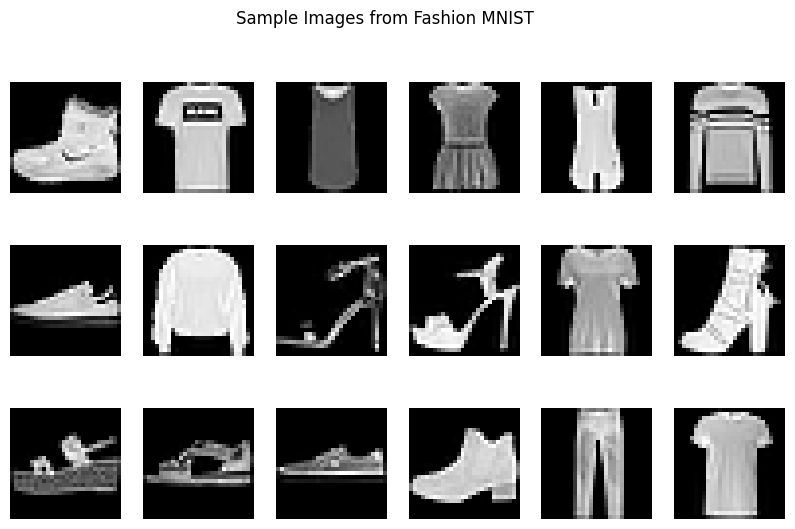

In [ ]:
# TODO: Create a 3x6 grid for displaying images
fig, axes = plt.subplots(3, 6, figsize=(10, 6))

# TODO: Loop through and display images
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(____, ____), cmap='gray')  # <-- Fill in the correct dimensions
    ax.axis("off")  # Hide axes for better visualization

# TODO: Add a title
plt.suptitle("Sample Images from Fashion MNIST")
plt.show()

Principal Component Analysis (PCA) is applied to reduce the dataset's dimensionality while retaining 95% of the variance. This transformation helps compress the data, removing redundancy while preserving essential features for classification.

*Student Task*: Complete the code below to apply PCA to **retain 95% of variance** in the dataset.

In [ ]:
# TODO: Apply PCA to retain 95% of variance
print("Applying PCA...")
pca = PCA(n_components=____)  # <-- Set the correct variance threshold

# TODO: Fit PCA on the training set and transform both training and test sets
X_train_pca = pca.____(____)  # <-- Apply PCA transformation to training data
X_test_pca = pca.____(____)  # <-- Transform test data using the trained PCA model

Applying PCA...


Now that we have **reduced the dimensionality** of the Fashion MNIST dataset using PCA, we will train a **Decision Tree Classifier** on the transformed data.

A Decision Tree Classifier is trained on the PCA-transformed Fashion MNIST dataset with a maximum depth of 10 to prevent overfitting. After training, predictions are made on the test set, and the model’s accuracy and classification report are displayed to evaluate its performance.


Decision trees are **interpretable models** that can efficiently classify images. By reducing dimensionality, we expect:
- Faster training time.
- Reduced risk of overfitting.
- Potential loss of some fine details.

After training, we will evaluate model performance using accuracy and a classification report.

*Student Task*: Complete the code below to train a Decision Tree on the PCA-transformed dataset and evaluate its performance.


In [ ]:
# TODO: Train a Decision Tree Classifier on the PCA-transformed training set
print("Training Decision Tree...")
decision_tree = DecisionTreeClassifier(max_depth=____, random_state=42)  # <-- Choose an appropriate max_depth

# TODO: Fit the model to the training data
decision_tree.____(____, ____)  # <-- Train the classifier

# TODO: Make predictions on the test set
y_pred_tree = decision_tree.____(____)  # <-- Predict on the PCA-transformed test data

# TODO: Print the accuracy score
print(f"Decision Tree Accuracy: {accuracy_score(____, ____):.4f}")  # <-- Fill in the correct variables

# TODO: Print the classification report
print("Decision Tree Classification Report:")
print(classification_report(____, ____))  # <-- Fill in the correct variables

Training Decision Tree...
Decision Tree Accuracy: 0.7498
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1000
           1       0.98      0.91      0.94      1000
           2       0.61      0.64      0.62      1000
           3       0.71      0.80      0.76      1000
           4       0.55      0.68      0.61      1000
           5       0.84      0.81      0.83      1000
           6       0.57      0.33      0.42      1000
           7       0.83      0.83      0.83      1000
           8       0.90      0.85      0.87      1000
           9       0.86      0.89      0.88      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In this section, a Decision Tree classifier is trained on the raw pixel data (without PCA) to compare its performance with the PCA-transformed approach. The model is trained with a maximum depth of 10 to prevent overfitting, and its accuracy is evaluated on the test set.

Since PCA removes some variance while compressing data, the classifier trained on raw pixel values often achieves slightly higher accuracy because it retains all available information. However, using PCA can still be beneficial when dealing with high-dimensional data, as it reduces computational complexity and mitigates the risk of overfitting, especially for models sensitive to redundant features.

By comparing the accuracy and classification report of:
1. **Decision Tree trained on PCA-transformed data** (lower dimensionality)
2. **Decision Tree trained on raw data** (original dimensionality)

We can analyze how PCA affects:
- **Model performance**
- **Training time and efficiency**
- **Overfitting risks**

*Student Task*: Complete the code below to train a Decision Tree on the original dataset and compare results.


In [ ]:
# TODO: Train a Decision Tree Classifier on the raw (high-dimensional) dataset
print("Training Decision Tree without PCA...")
decision_tree_raw = DecisionTreeClassifier(max_depth=____, random_state=42)  # <-- Choose an appropriate max_depth

# TODO: Fit the model to the original training data
decision_tree_raw.____(____, ____)  # <-- Train the classifier on raw data

# TODO: Make predictions on the original test set
y_pred_tree_raw = decision_tree_raw.____(____)  # <-- Predict on raw test data

# TODO: Print the accuracy score for the raw dataset
print(f"Decision Tree Accuracy without PCA: {accuracy_score(____, ____):.4f}")  # <-- Fill in the correct variables

# TODO: Print the classification report for the raw dataset
print("Decision Tree Classification Report without PCA:")
print(classification_report(____, ____))  # <-- Fill in the correct variables

Training Decision Tree without PCA...
Decision Tree Accuracy without PCA: 0.8008
Decision Tree Classification Report without PCA:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.97      0.92      0.95      1000
           2       0.65      0.67      0.66      1000
           3       0.82      0.81      0.82      1000
           4       0.60      0.73      0.66      1000
           5       0.94      0.86      0.90      1000
           6       0.57      0.50      0.53      1000
           7       0.86      0.93      0.90      1000
           8       0.93      0.90      0.91      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



#### 10.3 t-SNE for MNIST

In this section, we explore how to visualize high-dimensional data using t-Distributed Stochastic Neighbor Embedding (t-SNE). The dataset used is digits from sklearn.datasets, which contains images of handwritten digits (0-9) represented as 8×8 grayscale images. Since each image has 64 features (8×8 pixels), directly visualizing this high-dimensional space is difficult. t-SNE helps by reducing the dimensionality of the dataset to 2D, making it easier to observe patterns and clusters.

The code follows these key steps:

* Visualizing Sample Images – A few sample images from the dataset are displayed to understand the raw input.
* Flattening the Images – Since t-SNE works on feature vectors, the 8×8 images are reshaped into 1D vectors of length 64.
* Applying t-SNE for Dimensionality Reduction – The dataset is transformed into 2D space using TSNE(n_components=2), making it possible to visualize digit clusters.
* Plotting the Embedded Data – Each digit class is plotted in 2D space, with its center labeled, allowing us to see how well t-SNE groups similar digits together.

In [ ]:
from sklearn import datasets
from sklearn.manifold import TSNE

This code **loads the Digits dataset** from `sklearn.datasets`, which contains images of handwritten digits (0-9) and displays the first four images.

*Student Task*: Complete the code below to load the dataset and visualize **four random images** with their labels.

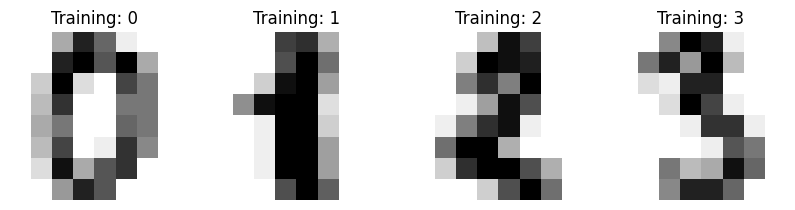

In [ ]:
# TODO: Load the Digits dataset
digits = datasets.____()  # <-- Fill in the correct function

# TODO: Create a subplot to display sample images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# TODO: Loop through the first four images and display them
for ax, image, label in zip(axes, digits.____, digits.____):  # <-- Fill in the correct attributes
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)  # Display digit label

plt.show()

The Digits dataset consists of 8×8 grayscale images, but PCA requires a flattened representation of each image.

To prepare the dataset:
1. Extract the number of images (x), height (y), and width (z).
2. Reshape each 8×8 image into a 1D feature vector (y * z = 64 features per image).

*Student Task*: Complete the code below to reshape the dataset into a 2D array where each row represents a single image.


In [ ]:
# TODO: Get the shape of the images dataset
x, y, z = digits.____.____  # <-- Fill in the correct attributes

# TODO: Reshape the dataset to flatten each image into a single feature vector
X = digits.images.reshape(x, y * z)

# TODO: Print the original and new shape of the dataset
print(x, y, z)
print(X.____)  # <-- Fill in the correct attribute

1797 8 8
(1797, 64)


t-SNE (t-Distributed Stochastic Neighbor Embedding) is a **non-linear dimensionality reduction technique** that helps visualize **high-dimensional data** in a lower-dimensional space.

In this step, we apply **t-SNE** to reduce the **64-dimensional Digits dataset** to **2D** for visualization.

To configure t-SNE:
1. Set n_components=2 to reduce the dataset to two dimensions.
2. Use learning_rate="auto" to automatically adjust the learning rate.
3. Initialize embedding with init="random".
4. Set perplexity=3 to control how the algorithm balances local and global aspects of the data.

*Student Task*: Complete the code below to apply **t-SNE** to the Digits dataset and check the shape of the transformed data.

In [ ]:
# TODO: Import t-SNE from scikit-learn
from sklearn.manifold import TSNE

# TODO: Apply t-SNE to reduce the Digits dataset to 2D
X_embedded = TSNE(n_components=____, learning_rate="____", init="____", perplexity=____).fit_transform(X)  # <-- Fill in the correct parameters

# TODO: Print the shape of the transformed dataset
print(X_embedded.____)  # <-- Fill in the correct attribute

(1797, 2)

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique that helps visualize high-dimensional data in a lower-dimensional space.

This code should plot the t-SNE-transformed data, grouping similar digits together in a 2D space based on their similarity. This code should
* Visualize how t-SNE groups similar digits in 2D space.
* Highlights cluster centers with large digit labels.
* Helps identify overlaps where digits may be misclassified.

To do this we need to:
1. Loop through each unique digit in the dataset.
2. Extract all points that belong to that digit.
3. Compute the average position of each digit cluster.
4. Plot the points and label them using the computed center.

*Student Task*: Complete the code below to visualize the results of t-SNE by plotting the transformed data with labels.


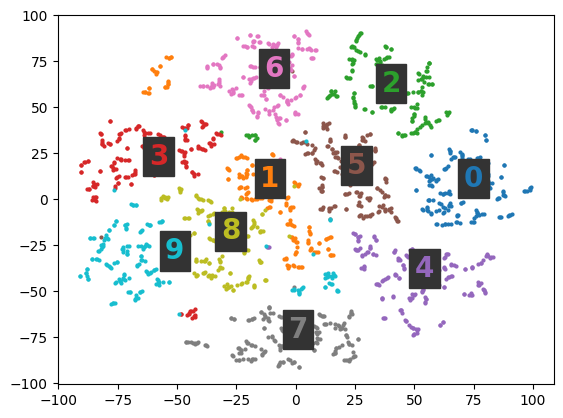

In [ ]:
# TODO: Loop through each unique digit and plot its corresponding points
for i in np.unique(digits.____):  # <-- Fill in the correct attribute
    temp_index = digits.____ == i  # <-- Create a mask for the current digit
    xy = X_embedded[temp_index]

    # TODO: Compute the center of each digit cluster
    center_x = np.mean(xy[:, ____])  # <-- Fill in the correct axis
    center_y = np.mean(xy[:, ____])

    # TODO: Plot the points for the current digit
    plt.plot(xy[:, 0], xy[:, 1], "o", markersize=2)

    # TODO: Retrieve the color of the last plotted digit and use it for labeling
    temp_color = plt.gca().lines[-1].get_color()

    # TODO: Add the digit label at the computed center
    plt.text(center_x, center_y, str(i), size=20, c=temp_color, fontweight="extra bold", backgroundcolor="#333333")

plt.show()

### Summary

In this lab, we explored dimensionality reduction techniques, focusing on Principal Component Analysis (PCA) and t-SNE. We began by applying PCA to facial image data, reconstructing images with varying numbers of principal components and analyzing the trade-off between dimensionality reduction and image quality. We then used t-SNE to visualize complex datasets in a lower-dimensional space, gaining insights into how this method differs from PCA. Through variance analysis and visualizations, we evaluated how well PCA preserves information while reducing complexity.

By the end of this lab, students gained hands-on experience in leveraging PCA and t-SNE to improve computational efficiency, extract key features, and visualize high-dimensional data more effectively.